In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [3]:
style.use('ggplot')

In [4]:
start = dt.datetime(2016,1,1) # From year 20000, 1st Jan
end = dt.datetime(2020,11,5)


In [5]:
df = web.DataReader('TSLA','yahoo',start,end)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-23,422.890015,407.380005,421.839996,420.630005,33717000.0,420.630005
2020-10-26,425.760010,410.000000,411.630005,420.279999,28239200.0,420.279999
2020-10-27,430.500000,420.100006,423.760010,424.679993,22686500.0,424.679993
2020-10-28,418.600006,406.000000,416.480011,406.019989,25451400.0,406.019989
2020-10-29,418.059998,406.459991,409.959991,410.829987,22655300.0,410.829987
2020-10-30,407.589996,379.109985,406.899994,388.040009,42511300.0,388.040009
2020-11-02,406.980011,392.299988,394.000000,400.510010,29021100.0,400.510010
2020-11-03,427.769989,406.690002,409.730011,423.899994,34351700.0,423.899994
2020-11-04,435.399994,417.100006,430.619995,420.980011,32143100.0,420.980011


In [6]:
#Inorder to save the tsla.csv file in the current directory
#df.to_csv('tsla.csv')
#and then
#df = pd.read_csv('tsla.csv',parse_dates=True,index_col=0)

#By default, date columns are represented as objects when loading data from a CSV file. To read the date column correctly,
#we can use the argument parse_dates to specify a list of date columns.

# Specifying Index column=0

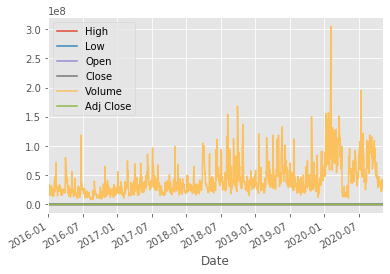

In [7]:
df.plot()

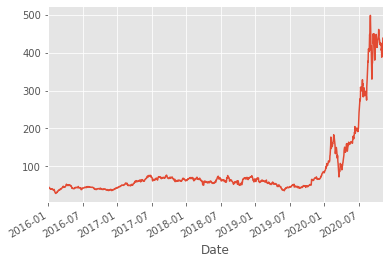

In [8]:
df['Adj Close'].plot()

In [9]:
df[['Open','High']].head()

,Open,High
Date,,
2015-12-31,47.702000,48.689999
2016-01-04,46.144001,46.276001
2016-01-05,45.271999,45.377998
2016-01-06,44.000000,44.009998
2016-01-07,42.838001,43.688000


In [10]:
#Moving Average 100 days - Prices of previous 100 days
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2015-12-31,48.689999,47.674000,47.702000,48.001999,13575000.0,48.001999,NaN
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999,NaN
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001,NaN
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999,NaN
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001,NaN


In [11]:
df.dropna(inplace=True)
# Dropping all nan values
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2016-05-24,43.748001,43.035999,43.320000,43.582001,15069000.0,43.582001,42.40762
2016-05-25,44.271999,43.301998,43.582001,43.916000,15634000.0,43.916000,42.36676
2016-05-26,45.051998,43.810001,44.099998,45.023998,20362000.0,45.023998,42.37018
2016-05-27,45.186001,44.150002,44.998001,44.608002,18251500.0,44.608002,42.36940
2016-05-31,44.950001,44.299999,44.608002,44.646000,13945000.0,44.646000,42.37778


In [12]:
#Moving Average 100 days - Prices of previous 100 days
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
df.head()
# By putting min_periods ,e.g. 2nd row of df100ma = avg of 1st and 2nd day

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2016-05-24,43.748001,43.035999,43.320000,43.582001,15069000.0,43.582001,43.582001
2016-05-25,44.271999,43.301998,43.582001,43.916000,15634000.0,43.916000,43.749001
2016-05-26,45.051998,43.810001,44.099998,45.023998,20362000.0,45.023998,44.174000
2016-05-27,45.186001,44.150002,44.998001,44.608002,18251500.0,44.608002,44.282500
2016-05-31,44.950001,44.299999,44.608002,44.646000,13945000.0,44.646000,44.355200


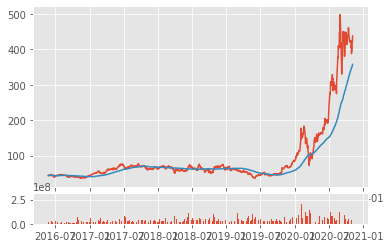

In [13]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
#(6,1) means grid-size = 6rows and 1 column,|(0,0) - Starting Point
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])
plt.show()
# Sharex= ax1 , both will share the same axes


## Resampling - Video4
Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

### Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
### Downsampling: Where you decrease the frequency of the samples, such as from days to months.
In both cases, data must be invented.

In the case of upsampling, care may be needed in determining how the fine-grained observations are calculated using interpolation. In the case of downsampling, care may be needed in selecting the summary statistics used to calculate the new aggregated values.

##### here are perhaps two main reasons why you may be interested in resampling your time series data:

### Problem Framing: Resampling may be required if your data is not available at the same frequency that you want to make predictions.

#### Feature Engineering: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

In [14]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp37-none-any.whl size=8428 sha256=e5d21365c8eb7a4c3af321adf0fbe84f4d095144067f7b405e7fd17fc7dff8c5
  Stored in directory: C:\Users\abc\AppData\Local\Temp\pip-ephem-wheel-cache-zm6nvpvk\wheels\8f\bf\8a\6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance
Note: you may need to restart the kernel to use updated packages.


In [15]:

from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
#ohlc - open high low close

C:\Users\abc\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


1. First we are downsampling our data (which could be milisecond data to 10 day data
for ohlc by using Adj.Close and Volume



2. OHLC Charts in Python
The OHLC chart (for open, high, low and close) is a style of financial chart describing open, 
high, low and close values for a given x coordinate (most likely time). The tip of the lines
represent the low and high values and
the horizontal segments represent the open and close values.



3. #date2num	Convert datetime objects to Matplotlib dates.

In [16]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.head()
#A new data frame itself is created
# i.e open high low close based on every 10 days of data and Date is the index

,open,high,low,close
Date,,,,
2016-05-24,43.582001,45.023998,43.582001,43.792000
2016-06-03,43.798000,47.104000,43.757999,43.757999
2016-06-13,43.574001,43.939999,39.332001,39.332001
2016-06-23,39.279999,43.299999,38.630001,43.299999
2016-07-03,42.796001,44.956001,42.796001,44.930000


In [17]:
#ohlc wants the date in mdates format and dates open [high lo close]
#1.Take date off as index
df_ohlc.reset_index(inplace=True)

#2 Converting Dates into mdates
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()
#See date is 736108

,Date,open,high,low,close
0,736108.0,43.582001,45.023998,43.582001,43.792000
1,736118.0,43.798000,47.104000,43.757999,43.757999
2,736128.0,43.574001,43.939999,39.332001,39.332001
3,736138.0,39.279999,43.299999,38.630001,43.299999
4,736148.0,42.796001,44.956001,42.796001,44.930000


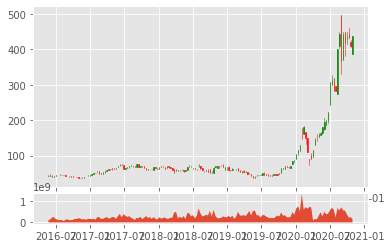

In [19]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
#Below What axis, your data , width of candlestick , Color = Green -price up and red price-down
candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
#Above fill_between - xand y from 0 
plt.show()